# **Introduction**

We will use TensorFlow to analyse a dataset of 6000 individuals to determine if an individiual is elgible for loans. The dataset, presumably sourced from a financial institution or a public data repository, contains 6000 instances with 14 features each. It is designed to aid in predicting individual loan eligibility, a crucial task for any lending organization aiming to minimize risk while providing fair opportunities for loan applicants.

The dataset includes a mix of numerical and categorical variables, offering a comprehensive profile of applicants. Understanding the characteristics that correlate with loan repayment ability can lead to more informed lending decisions, potentially reducing the risk of default while extending credit opportunities to qualified applicants.

** Here is the table of contents. **

1.   Exploratory Data Analysis
2.   Data Visualizations
3.   Machine Learning Model Decision
4.   Training the ML Model
5.   Predict & Deploy Model

# **Gathering Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('loan_data.csv')

In [ ]:
df.shape, df.shape

((9578, 14), (9578, 14))

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [ ]:
df.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
3452,1,debt_consolidation,0.1189,79.60,10.968129,24.39,692,5279.958333,18430,63.3,2,0,0,0
1790,1,major_purchase,0.1158,280.62,10.239817,20.75,717,2716.041667,12496,57.3,0,0,0,0
9022,0,small_business,0.1379,425.95,11.156251,16.73,697,8549.958333,74042,41.9,1,2,0,0
5464,1,educational,0.0894,158.86,9.729134,14.93,732,3569.958333,6109,43.9,1,0,0,0
7565,1,credit_card,0.0639,45.91,11.251561,2.38,772,3510.041667,3947,7.6,0,0,0,0


In [ ]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [ ]:
purpose_type = pd.unique(df['purpose'])

In [ ]:
print(purpose_type)
print(len(purpose_type))

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']
7


# **Exploratory Data Analysis**

Here's a breakdown of what each of these categories represents:

1. **credit.policy**: A binary indicator (1 or 0) where '1' might indicate that the borrower meets the credit underwriting criteria of the lender, and '0' means they do not meet those criteria.

2. **purpose**: This describes the reason the loan is requested for, such as 'debt_consolidation' or 'home_improvement'.

3. **int.rate**: The interest rate of the loan, expressed as a decimal. For example, 0.0832 would be an 8.32% interest rate.

4. **installment**: The monthly payment owed by the borrower if the loan is funded.

5. **log.annual.inc**: The natural logarithm of the self-reported annual income of the borrower. Taking the logarithm of an income is a common transformation in statistical analyses to handle wide variations in income levels and bring the distribution closer to normal.

6. **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income). This is a measure of the borrower's ability to manage monthly payments and repay debts.

7. **fico**: The FICO credit score of the borrower. FICO scores are a type of credit score used to determine the likelihood that credit users will pay their bills.

8. **days.with.cr.line**: The number of days the borrower has had a credit line. This could be interpreted as the age of the borrower's credit history.

9. **revol.bal**: The borrower's revolving balance (the amount unpaid at the end of a credit card billing cycle).

10. **revol.util**: The borrower's revolving line utilization rate, which is the amount of the credit line used relative to total credit available.

11. **inq.last.6mths**: The number of inquiries by creditors into the borrower's credit during the past 6 months.

12. **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

13. **pub.rec**: The number of derogatory public records the borrower has (bankruptcy filings, tax liens, or judgments).

14. **not.fully.paid**: A binary indicator, showing whether the borrower has not fully paid back the loan (1) or if they have (0).

<ipython-input-96-e0bb5e009d8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


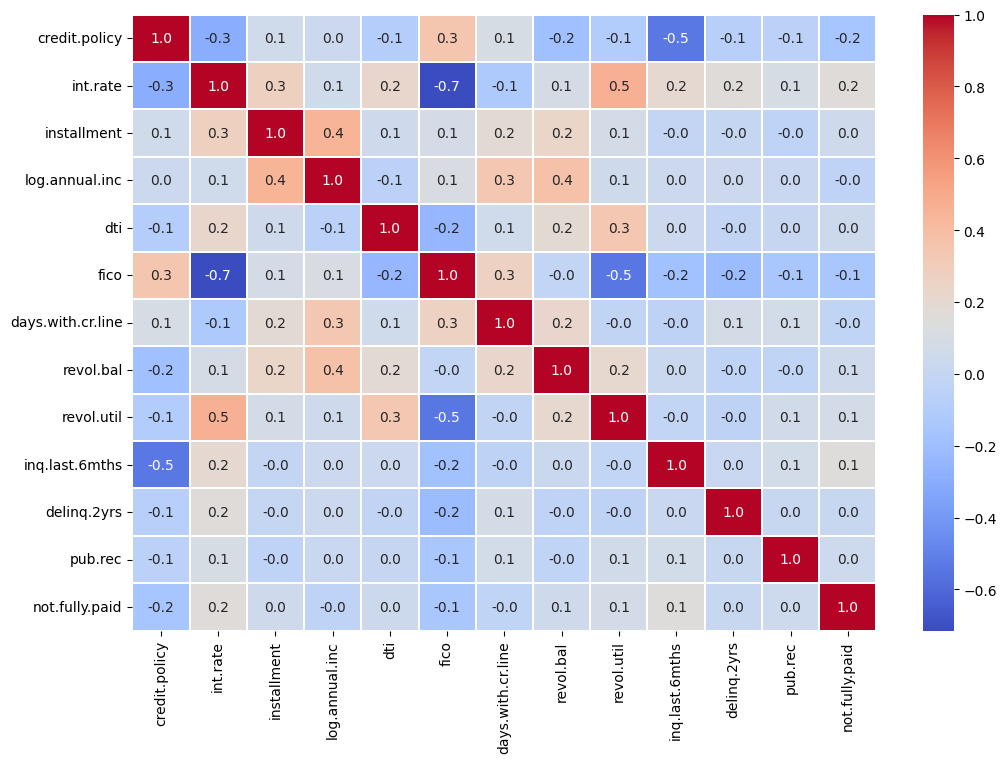

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

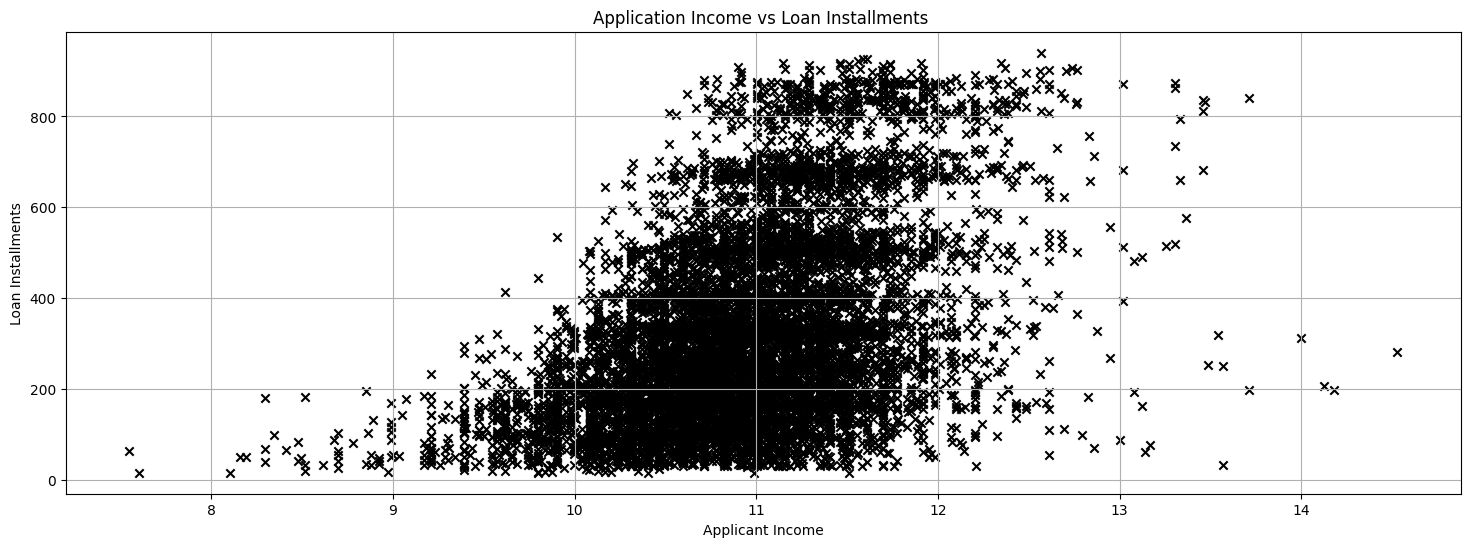

In [ ]:
plt.figure(figsize=(18, 6))
plt.title("Application Income vs Loan Installments ")

plt.grid()
plt.scatter(df['log.annual.inc'] , df['installment'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Installments")
plt.show()

In [ ]:
df['not.fully.paid'].isnull().mean()
paid = df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

nfp = paid.loc[1]
fp = paid.loc[0]

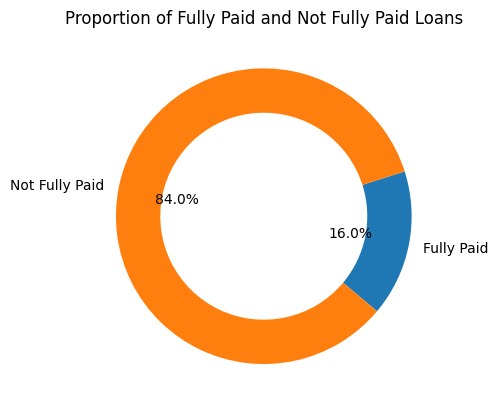

In [ ]:
labels = ['Fully Paid', 'Not Fully Paid']
sizes = [nfp, fp]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=-40, wedgeprops=dict(width=0.3))

ax.set_title("Proportion of Fully Paid and Not Fully Paid Loans")
plt.show()

median: 12.665
mean: 12.60667884735853
max: 29.96
min: 0.0


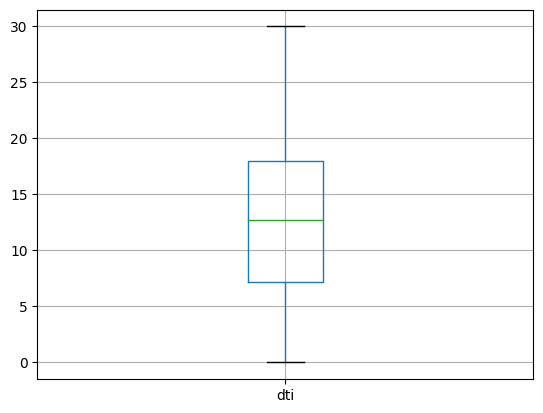

In [ ]:
df['dti'].to_frame().boxplot()

median = df['dti'].median()
mean = df['dti'].mean()
max = df['dti'].max()
min = df['dti'].min()

print('median:',median)
print('mean:',mean)
print('max:',max)
print('min:',min)

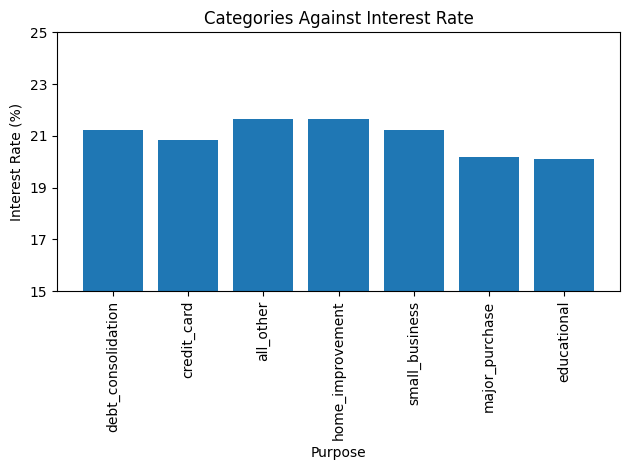

In [ ]:
plt.bar(df['purpose'], df['int.rate']*100)

plt.xlabel('Purpose')
plt.xticks(rotation=90)

plt.ylim(15, 25)  # Set the limits of y-axis
plt.yticks(range(15, 26, 2))
plt.ylabel('Interest Rate (%)')

plt.title('Categories Against Interest Rate')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Annual Income')

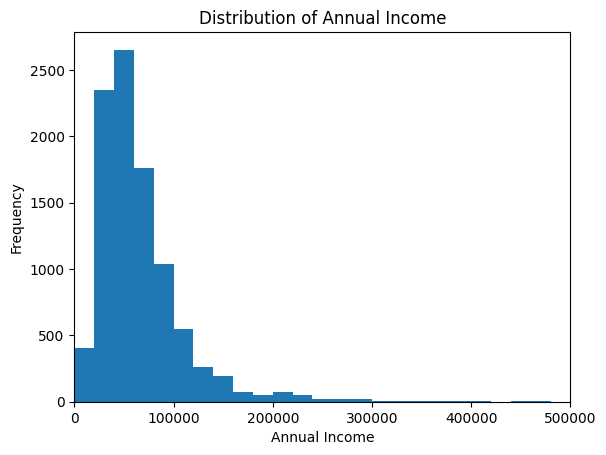

In [ ]:
annual_income = np.exp(df['log.annual.inc'].to_numpy())

plt.hist(annual_income, bins=25, range=(0, 500000))

plt.xlim(0, 500000)

plt.xlabel('Annual Income')
plt.ylabel('Frequency')

plt.title('Distribution of Annual Income')

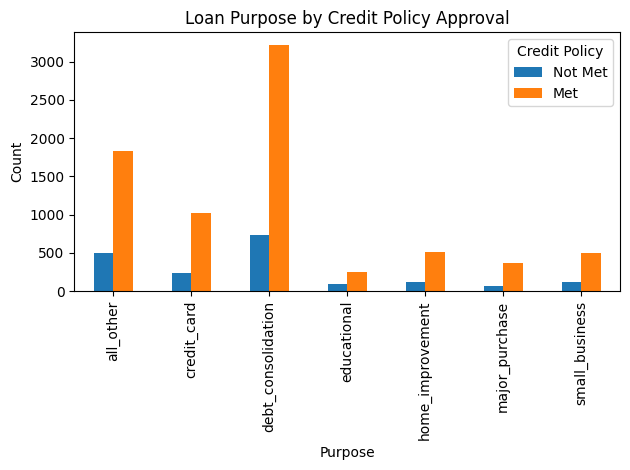

In [ ]:
ctab = pd.crosstab(df['purpose'], df['credit.policy'])

ctab.plot(kind='bar')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Loan Purpose by Credit Policy Approval')
plt.xticks(rotation=90)
plt.legend(title='Credit Policy', labels=['Not Met', 'Met'])
plt.tight_layout()
plt.show()

# **Training the Model**


**Resampling the Data**

In [ ]:
from collections import Counter

As we can see here, the proportion of eligible to non-eligible applications is imbalanced.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
df['credit.policy'] = label_encoder.fit_transform(df['credit.policy'])

df_encoded = pd.get_dummies(df, columns=['purpose'])
#df = df.drop('log.annual.inc', axis=1)

X = df_encoded.drop('credit.policy', axis=1).values
y = df_encoded['credit.policy'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101,stratify=y)

smote = SMOTE(sampling_strategy=0.4, random_state=101)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
original_distribution = Counter(df['credit.policy'])

yes = X_train
no =  y_train

labels = ['Yes', 'No']
sizes = [yes, no]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=-40, wedgeprops=dict(width=0.3))

ax.set_title("Proportion of Eligible to Non-Eligible Applications")
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-a0f128dd8495>, line 4)

**Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
model = Sequential([
    Dense(200, activation='relu', input_shape=(X_test.shape[1],)),
    Dense(50, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.91):
      print("\nReached 91% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=600, batch_size=120,callbacks=[callbacks])

#evaluation = model.evaluate(X_test, y_test)
#print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

Epoch 1/500
45/45 [==============================] - 1s 2ms/step - loss: 89.5320 - accuracy: 0.6266
Epoch 2/500
45/45 [==============================] - 0s 2ms/step - loss: 4.7713 - accuracy: 0.6357
Epoch 3/500
45/45 [==============================] - 0s 3ms/step - loss: 3.8169 - accuracy: 0.6591
Epoch 4/500
45/45 [==============================] - 0s 3ms/step - loss: 3.0908 - accuracy: 0.6776
Epoch 5/500
45/45 [==============================] - 0s 3ms/step - loss: 4.1286 - accuracy: 0.6793
Epoch 6/500
45/45 [==============================] - 0s 3ms/step - loss: 4.7667 - accuracy: 0.6741
Epoch 7/500
45/45 [==============================] - 0s 3ms/step - loss: 2.7390 - accuracy: 0.7019
Epoch 8/500
45/45 [==============================] - 0s 2ms/step - loss: 4.0017 - accuracy: 0.6730
Epoch 9/500
45/45 [==============================] - 0s 3ms/step - loss: 5.0607 - accuracy: 0.6674
Epoch 10/500
45/45 [==============================] - 0s 2ms/step - loss: 2.6721 - accuracy: 0.7045
Epoch 11

In [ ]:
model.evaluate(X_test, y_test)

150/150 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.9062


[0.2522569000720978, 0.9062435030937195]

In [ ]:
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix

predictions_prob = model.predict(X_test)
predictions = (predictions_prob > 0.5).astype(int)

cm = confusion_matrix(y_test,predictions)

print(cm)

150/150 [==============================] - 0s 1ms/step
[[ 664  270]
 [ 179 3676]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=101)
rf_model.fit(X_train, y_train)

tf_predictions = model.predict(X_test)

rf_predictions = rf_model.predict_proba(X_test)[:, 1]

combined_predictions = (tf_predictions.flatten() + rf_predictions) / 2

final_predictions = np.where(combined_predictions > 0.5, 1, 0)

ensemble_accuracy = accuracy_score(y_test, final_predictions)

print(f'Ensemble Model Accuracy: {ensemble_accuracy}')

150/150 [==============================] - 1s 3ms/step
Ensemble Model Accuracy: 0.9663812904572979


In [ ]:
cm = confusion_matrix(y_test,final_predictions)
print(cm)

[[ 812  122]
 [  39 3816]]
